In [173]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

%matplotlib inline

df_train = pd.read_csv('../data/train.csv', delimiter=",")

### Explore the Data

In [96]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df_train.shape

(891, 12)

#### Select Boxplots

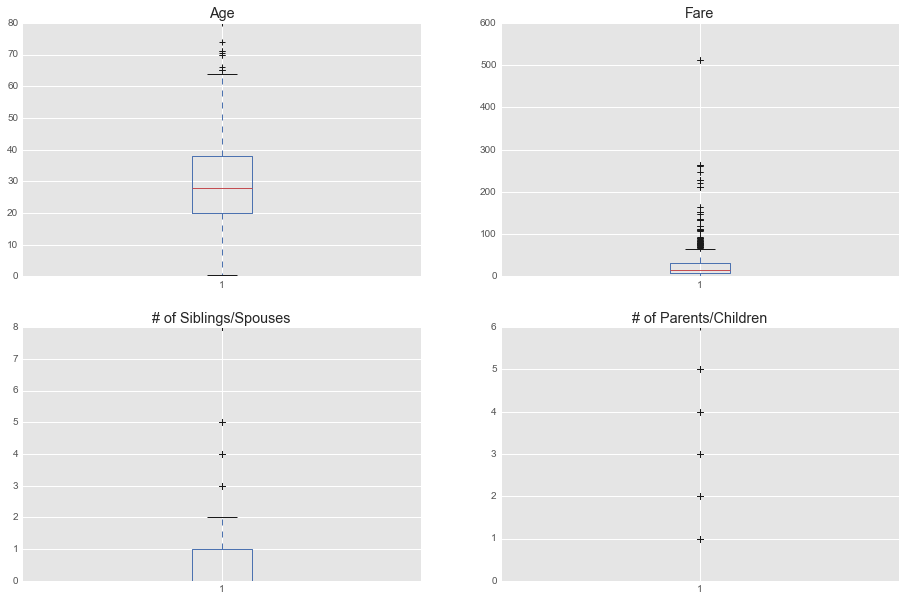

In [193]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
axs[0,0].boxplot(df_train.Age.dropna())
axs[0,0].set_title("Age")
axs[0,1].boxplot(df_train.Fare.dropna())
axs[0,1].set_title("Fare")
axs[1,0].boxplot(df_train.SibSp.dropna())
axs[1,0].set_title("# of Siblings/Spouses")
axs[1,1].boxplot(df_train.Parch.dropna())
axs[1,1].set_title("# of Parents/Children")
plt.style.use("ggplot")
plt.show()

In [194]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Passengers by Class and Gender

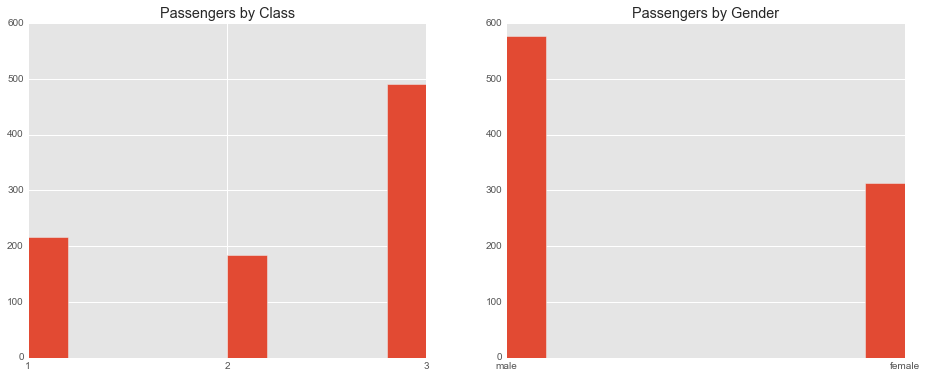

In [195]:
fig,axs=plt.subplots(1,2,figsize=(14,6))
df_train.Pclass.hist(ax=axs[0])
axs[0].set_xticks([1, 2, 3])
axs[0].set_yticks(np.arange(0, 700, step=100))
axs[0].set_title("Passengers by Class")
df_train.Sex.hist(ax=axs[1])
axs[1].set_title("Passengers by Gender")
axs[1].set_yticks(np.arange(0, 700, step=100))
plt.show()

### Age Distributions

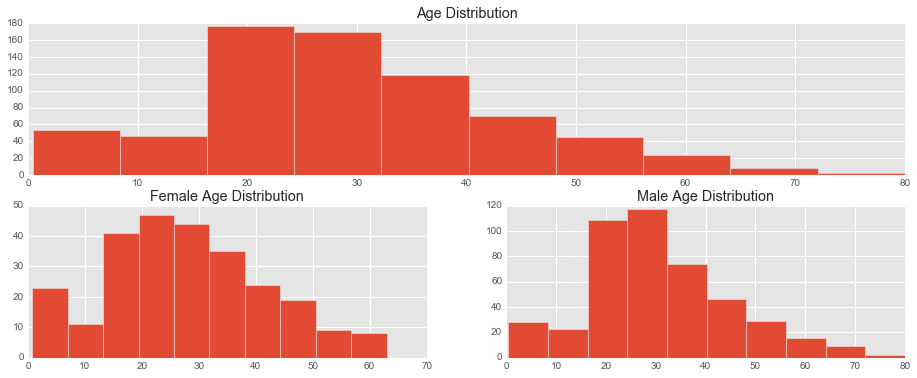

In [196]:
fig = plt.figure(figsize=(14,6))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
df_train.Age.hist(ax=ax1)
ax1.set_title("Age Distribution")
ax2 = fig.add_subplot(gs[-1, 0])
df_train[df_train["Sex"]=="female"].Age.hist(ax=ax2)
ax2.set_title("Female Age Distribution")
ax3 = fig.add_subplot(gs[-1, 1])
df_train[df_train["Sex"]=="male"].Age.hist(ax=ax3)
ax3.set_title("Male Age Distribution")
plt.show()

### Fare Distributions

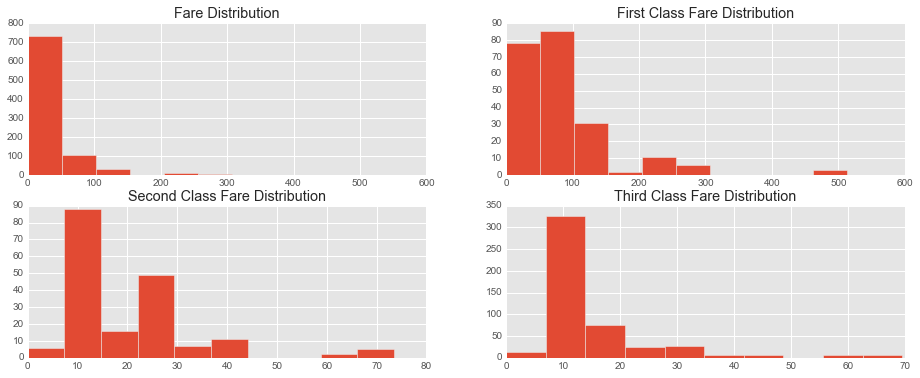

In [186]:
fig,axs=plt.subplots(2,2,figsize=(14,6))
df_train.Fare.hist(ax=axs[0,0])
axs[0,0].set_title("Fare Distribution")
df_train[df_train["Pclass"]==1].Fare.hist(ax=axs[0,1])
axs[0,1].set_title("First Class Fare Distribution")
df_train[df_train["Pclass"]==2].Fare.hist(ax=axs[1,0])
axs[1,0].set_title("Second Class Fare Distribution")
df_train[df_train["Pclass"]==3].Fare.hist(ax=axs[1,1])
axs[1,1].set_title("Third Class Fare Distribution")
plt.show()

### Survival by Gender and Passenger Class

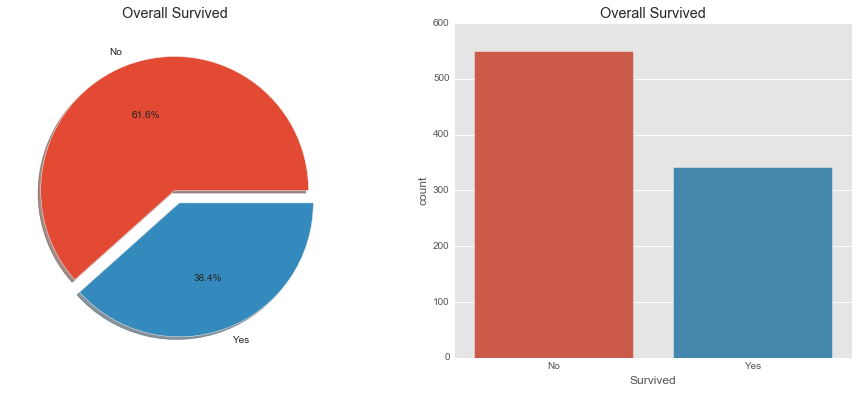

In [198]:
fig,axs=plt.subplots(1,2,figsize=(14,6))
df_train.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['No','Yes'],ax=axs[0],shadow=True)
axs[0].set_title('Overall Survived')
axs[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=axs[1])
axs[1].set_title('Overall Survived')
axs[1].set_xticklabels(['No','Yes'])
plt.show()

In [144]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [145]:
df_train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival Counts by Gender')

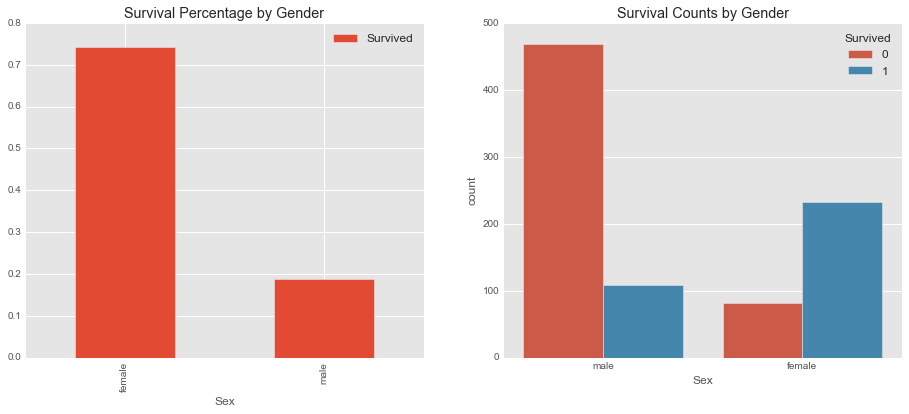

In [199]:
fig,axs=plt.subplots(1,2,figsize=(14,6))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=axs[0])
axs[0].set_title('Survival Percentage by Gender')
sns.countplot("Sex",hue="Survived",data=df_train,ax=axs[1])
axs[1].set_title('Survival Counts by Gender')

[Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')]

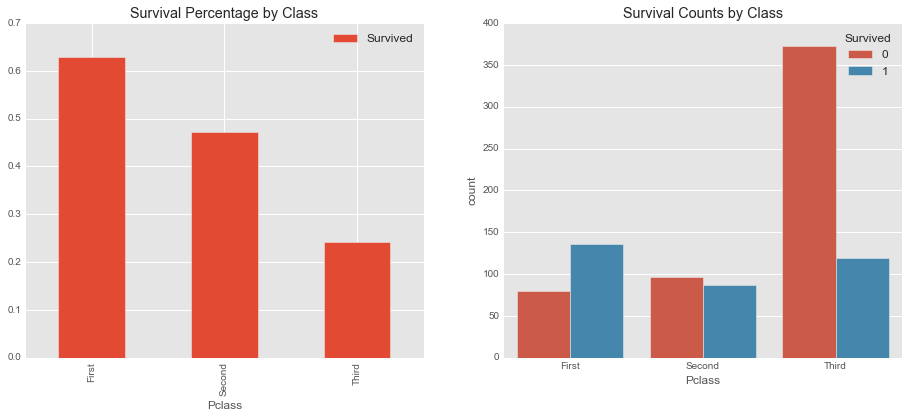

In [202]:
fig,axs=plt.subplots(1,2,figsize=(14,6))
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=axs[0])
axs[0].set_title('Survival Percentage by Class')
axs[0].set_xticklabels(["First", "Second", "Third"])
sns.countplot("Pclass",hue="Survived",data=df_train,ax=axs[1])
axs[1].set_title('Survival Counts by Class')
axs[1].set_xticklabels(["First", "Second", "Third"])

<function matplotlib.pyplot.show(*args, **kw)>

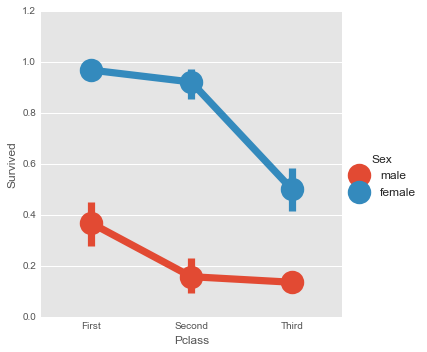

In [183]:
cp = sns.catplot('Pclass','Survived',hue='Sex',data=df_train, kind="point")
cp.set_xticklabels(["First", "Second", "Third"])
plt.show